In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_df = pd.read_csv('loan_approval_pred_dataset.csv')
print(train_df.info())

train_df = train_df.drop(columns=['Loan_ID']) 
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
print('Categorical columns :', categorical_columns)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print('Numerical columns : ', numerical_columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
Categorical columns : ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'C

In [ ]:
# Visualising the data
import seaborn as sns
import matplotlib.pyplot as plt

fig,axes = plt.subplots(4, 2, figsize = (12, 15))

for idx, cat_col in enumerate(categorical_columns):
    row, col = idx//2, idx%2
    sns.countplot(x = cat_col, data = train_df, hue = 'Loan_Status', ax = axes[row,col])

plt.subplots_adjust(hspace = 0.5)

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(17,5))

for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y = cat_col, data = train_df, x = 'Loan_Status', ax = axes[idx])
    #sns.countplot(x=cat_col, data=train_df, hue='Loan_Status', ax=axes[idx])

print(train_df[numerical_columns].describe())
plt.subplots_adjust(hspace = 1)

# Encoding categrical Features: 
train_df_encoded = pd.get_dummies(train_df, drop_first = True)
#train_df_encoded.head()

In [134]:
# Split Features and Target Variable
X = train_df_encoded.drop(columns ='Loan_Status_Y')
y = train_df_encoded['Loan_Status_Y']

# Splitting into Training set and Test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

# Handling/ Imputing Missing values 
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = 'mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)


In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg =  LogisticRegression(solver = 'liblinear')
log_reg.fit(X_train, y_train)
log_score = cross_val_score(log_reg, X_train, y_train, cv = 5)
print("Logistic Regression: ", round(log_score.mean(),2)*100, "% accuracy score")

# KNeighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_score = cross_val_score(knn, X_train, y_train, cv = 5)
print("KNeighbors: ", round(knn_score.mean(),2)*100, "% accuracy score")

# Decision Tree
dcTree = DecisionTreeClassifier()
dcTree.fit(X_train, y_train)
dcTree_score = cross_val_score(dcTree, X_train, y_train, cv = 5)
print("Decision Tree: ", round(dcTree_score.mean(),2)*100, "% accuracy score")

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_score = cross_val_score(rf, X_train, y_train, cv=5)
print("Random Forest: ",  round(rf_score.mean(),2)*100, "% accuracy score")


Logistic Regression:  80.0 % accuracy score
KNeighbors:  65.0 % accuracy score
Decision Tree:  68.0 % accuracy score
Random Forest:  78.0 % accuracy score


In [139]:
# Logistic regression
from sklearn.model_selection import GridSearchCV

log_reg_params = {"penalty":['l1','l2'], 
                  'C':[0.001, 0.1, 1, 10,100],
                  'solver':['liblinear']}
grid_log_reg = GridSearchCV(LogisticRegression(),log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_params_
print(log_reg)


{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [137]:
# KNN
knn_params = {"n_neighbors":[1,3,5], 'algorithm':['auto']}
grid_knn = GridSearchCV(KNeighborsClassifier(),knn_params)
grid_knn.fit(X_train, y_train)
knn = grid_knn.best_params_
print(knn)


{'algorithm': 'auto', 'n_neighbors': 5}


In [138]:
# Decision Tree
tree_params = {'criterion':['gini','entropy'],"max_depth":[2,4,6],"min_samples_leaf":[5,7,9,]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
dcTree = grid_tree.best_params_
print(dcTree)


{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}


In [124]:
# RandomForest
rf_params = {'n_estimators':[100,200,300],'max_features':['auto','sqrt'],"min_samples_leaf":[1,2,4,6],"bootstrap":[True, False]}
grid_rf = GridSearchCV(RandomForestClassifier(),rf_params)
grid_rf.fit(X_train, y_train)
rf = grid_rf.best_params_
print(rf)


{'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 200}


In [142]:
# Logistic Regression
log_reg =  LogisticRegression(C = 10, penalty = 'l1', solver = 'liblinear')
log_reg.fit(X_train, y_train)
log_score = cross_val_score(log_reg, X_train, y_train,cv=5, scoring = 'accuracy')
print('Logistic Regression: ', round(log_score.mean(),2)*100, "% accuracy score")

# KNeighbors
knn = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 5)
knn.fit(X_train, y_train)
knn_score = cross_val_score(knn, X_train, y_train,cv=5, scoring = 'accuracy')
print("KNeighbors: ", round(knn_score.mean(),2)*100, "% accuracy score")

# Decision Tree
dcTree = DecisionTreeClassifier(criterion= 'gini', max_depth= 2, min_samples_leaf= 5)
dcTree.fit(X_train, y_train)
dcTree_score = cross_val_score(dcTree, X_train, y_train, cv=5 ,scoring = 'accuracy')
print("Decision Tree: ", round(dcTree_score.mean(),2)*100, "% accuracy score")

# Random Forest
rf = RandomForestClassifier(bootstrap= True, max_features= 'auto', min_samples_leaf= 2, n_estimators= 200)
rf.fit(X_train, y_train)
rf_score = cross_val_score(rf, X_train, y_train, cv=5, scoring = 'accuracy')
print("Random Forest: ",  round(rf_score.mean(),2)*100, "% accuracy score")


Logistic Regression:  80.0 % accuracy score
KNeighbors:  65.0 % accuracy score
Decision Tree:  81.0 % accuracy score
Random Forest:  80.0 % accuracy score


ROC_AUC_SCORE of models on Train Set

Logistic Regression:  78
KNeighbors:  78
Decision Tree:  72
Random Forest:  99


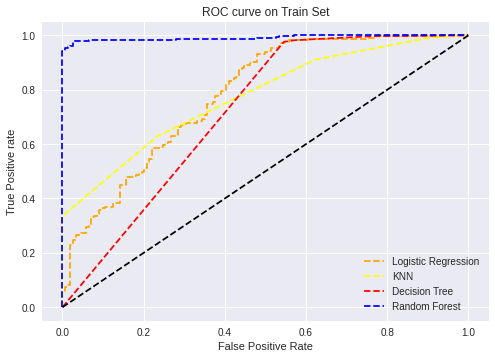

In [143]:
"""
Model evaluation, comparison and selection
# ROC CURVE and ROC-AUC score
# On Train dataset
"""

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
log_reg_proba = log_reg.predict_proba(X_train) 
knn_proba = knn.predict_proba(X_train)
dt_proba = dcTree.predict_proba(X_train)
rf_proba = rf.predict_proba(X_train)

# roc_auc_score
log_reg_auc = round(roc_auc_score(y_train, log_reg_proba[:,1])*100)
knn_auc = round(roc_auc_score(y_train, knn_proba[:,1])*100)
dt_auc =  round(roc_auc_score(y_train, dt_proba[:,1])*100)
rf_auc = round(roc_auc_score(y_train, rf_proba[:,1])*100)

print("ROC_AUC_SCORE of models on Train Set\n")
print("Logistic Regression: ", log_reg_auc)
print("KNeighbors: ",knn_auc)
print("Decision Tree: ",dt_auc)
print("Random Forest: ",rf_auc)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_train, log_reg_proba[:,1],pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_train, knn_proba[:,1],pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_train, dt_proba[:,1],pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_train, rf_proba[:,1],pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_train))]
p_fpr, p_tpr, _ = roc_curve(y_train, random_probs, pos_label=1)

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='KNN')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='Decision Tree')
plt.plot(fpr5, tpr5, linestyle='--',color='blue', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')

plt.title('ROC curve on Train Set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()


ROC_AUC_SCORE of models on Test Set

Logistic Regression:  83
KNeighbors:  46
Random Forest:  79


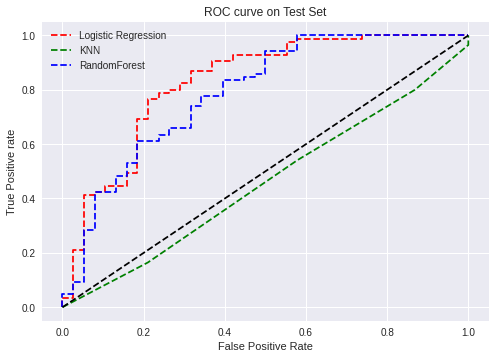

In [144]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

log_reg_proba_test = log_reg.predict_proba(X_test_imp) 
knn_proba_test = knn.predict_proba(X_test_imp)
rf_proba_test = rf.predict_proba(X_test_imp)

#dt_proba_test = dcTree.predict_proba(X_test_imp)

knn_auc_test = round(roc_auc_score(y_test, knn_proba_test[:,1])*100)
log_reg_auc_test=  round(roc_auc_score(y_test, log_reg_proba_test[:,1])*100)
rf_auc_test = round(roc_auc_score(y_test, rf_proba_test[:,1])*100)

#dt_auc_test =  round(roc_auc_score(y_test, dt_proba_test[:,1])*100)

print("ROC_AUC_SCORE of models on Test Set\n")
print("Logistic Regression: ", log_reg_auc_test)
print("KNeighbors: ",knn_auc_test)
#print("Decision Trees: ", dt_auc_test)
print("Random Forest: ", rf_auc_test)


fpr1, tpr1, thresh1 = roc_curve(y_test, log_reg_proba_test[:,1],pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, knn_proba_test[:,1],pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, rf_proba_test[:,1],pos_label=1)

#fpr4, tpr4, thresh4 = roc_curve(y_test, dt_proba_test[:,1],pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
#plt.plot(fpr4, tpr4, linestyle='--',color='red', label='Decision Tree')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='RandomForest')


plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
plt.title('ROC curve on Test Set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()
